# Imports

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

import warnings
warnings.filterwarnings("ignore")

# Generate data

In [34]:
X = np.random.uniform(low=0.0, high=1.0, size=(6000, 2))
X0 = X[X[:, 1] <= -X[:, 0] + 1]
y0 = np.zeros(X0.shape[0])

X = np.random.uniform(low=0.0, high=1.0, size=(6000, 2))
X1 = X[X[:, 1] <= X[:, 0]]
y1 = np.ones(X1.shape[0])



In [35]:
X0.shape, y0.shape, X1.shape, y1.shape

((2940, 2), (2940,), (2980, 2), (2980,))

In [37]:
df = pd.DataFrame()
df[['x', 'y']] =  np.vstack((X0, X1))
df['target'] = np.hstack((y0, y1))

In [39]:
df.sample(5)

,x,y,target
3033,0.186232,0.088521,1.0
4860,0.496699,0.405847,1.0
1500,0.394224,0.056009,0.0
2913,0.006297,0.355237,0.0
39,0.373057,0.007555,0.0


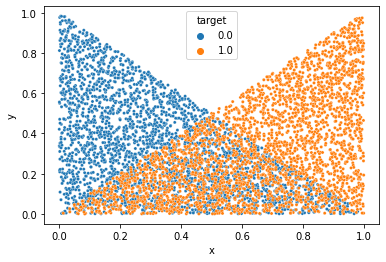

In [45]:
sns.scatterplot(data=df, x='x', y='y', hue='target', s=10)
plt.show()

# Calculate metrics for every threshold value

In [49]:
thresholds = np.linspace(0, 1, 11)

In [50]:
thresholds

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [64]:
from sklearn.metrics import (
    roc_curve, 
    auc, 
    precision_score, 
    recall_score,
    precision_recall_curve,
    PrecisionRecallDisplay,
    roc_auc_score
)

rocs = {}
prs = {}
precisions = {}
recalls = {}
rocaucs = {}

In [65]:
for t in tqdm(thresholds):
    y_score = np.where(df.x <= t, 0., 1.)
    
    fpr, tpr, _ = roc_curve(df.target, y_score)
    rocs[t] = (fpr, tpr)
    
    prec, recall, _ = precision_recall_curve(df.target, y_score)
    prs[t] = (prec, recall)
    
    precisions[t] = precision_score(df.target, y_score)
    
    recalls[t] = recall_score(df.target, y_score)
    
    rocaucs[t] = roc_auc_score(df.target, y_score)

  0%|          | 0/11 [00:00<?, ?it/s]

# Plot metrics

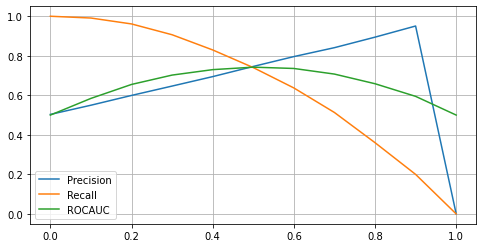

In [66]:
plt.figure(figsize=(8, 4))
plt.plot(precisions.keys(), precisions.values(), label='Precision')
plt.plot(recalls.keys(), recalls.values(), label='Recall')
plt.plot(rocaucs.keys(), rocaucs.values(), label='ROCAUC')
plt.legend()
plt.grid()
plt.show()

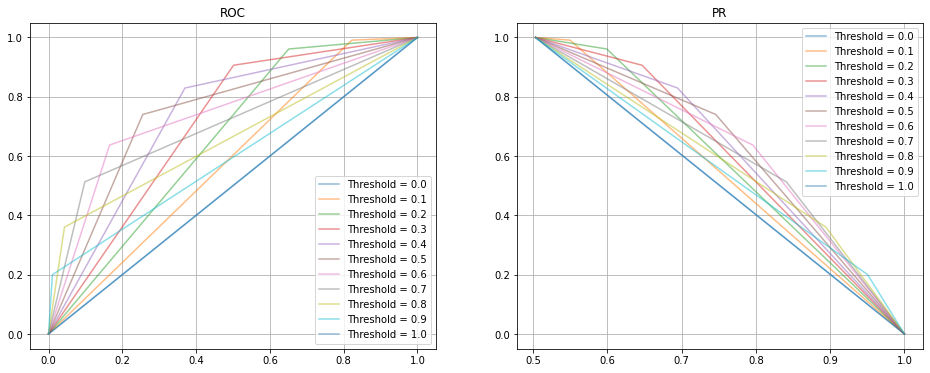

In [75]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].set_title('ROC')
ax[1].set_title('PR')
for t in thresholds:
    ax[0].plot(rocs[t][0], rocs[t][1], label=f'Threshold = {np.round(t, 1)}', alpha=0.5)

    
    
    ax[1].plot(prs[t][0], prs[t][1], label=f'Threshold = {np.round(t, 1)}', alpha=0.5)

    
ax[0].grid()
ax[0].legend()
ax[1].grid()
ax[1].legend()

plt.show()